# Advanced Statistics Workbook - DLMDSAS01

In [45]:
import numpy as np
from scipy import integrate
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

### Assignment 1: Basic Probabilities and Visualizations (1)

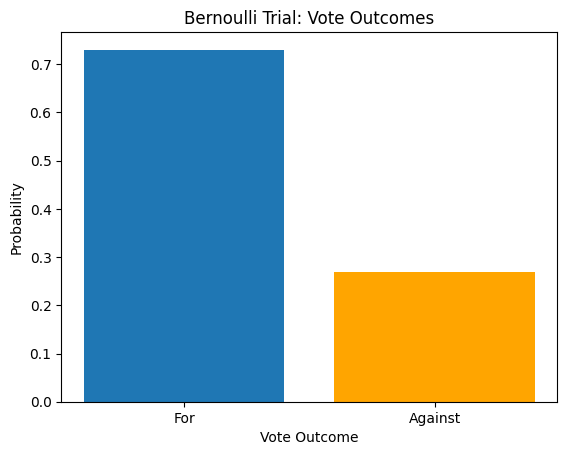

P(vote = "for") = 0.73
P(vote = "against") = 0.27


In [1]:
# Probabilities
p_for = 0.73
p_against = 1 - p_for

# Bar plot
plt.bar(['For', 'Against'], [p_for, p_against], color=['C0', 'orange'])
plt.xlabel('Vote Outcome')
plt.ylabel('Probability')
plt.title('Bernoulli Trial: Vote Outcomes')
plt.show()

print(f'P(vote = "for") = {p_for}')
print(f'P(vote = "against") = {p_against}')

### Assignment 2: Basic Probabilities and Visualizations (2)

Probability of waiting between 2 and 4 hours: 9.129624653020082e-06
Mean waiting time: 0.12083333333333365
Variance of waiting time: 0.035864577524842164
Q1 (1st quartile): 0.0025564537179307155
Q2 (Median): 0.033014446683944626
Q3 (3rd quartile): 0.30909803348316406


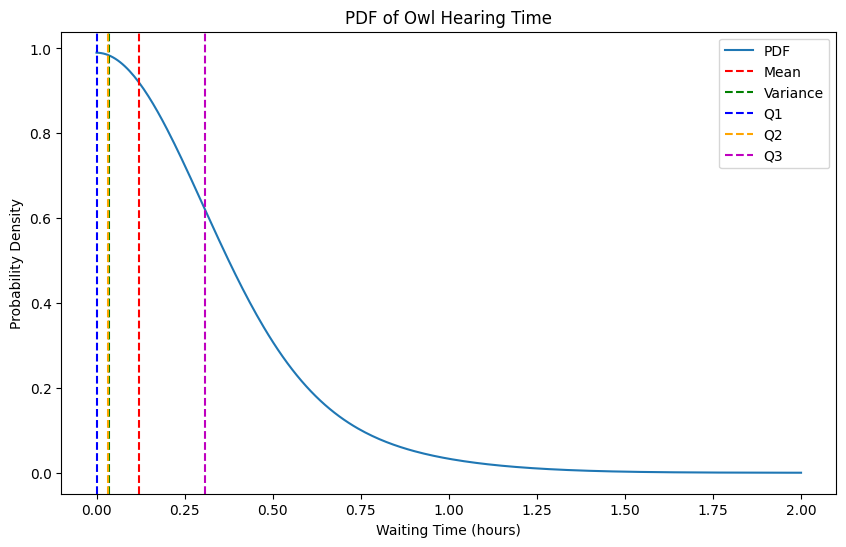

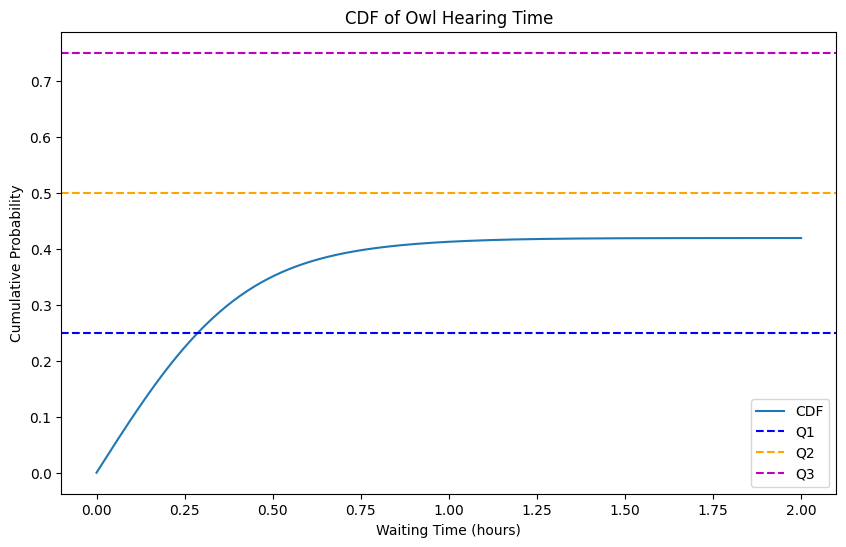

In [106]:
# Define parameters
ξ5 = 0.23
ξ6 = 2
ξ7 = 0.76
ξ8 = 6

# Define the PDF function
def pdf(y):
  return ξ5 * np.exp(-ξ6 * y**2) + ξ7 * np.exp(-ξ8 * y**2)

# Function for numerical integration
def integrate_func(f, a, b):
  return integrate.quad(f, a, b)[0]

# Calculate PDF values for visualization (optional)
y = np.linspace(0, 2, 300)
pdf_values = pdf(y)
prob_2_to_4 = integrate_func(pdf, 2, 4)

# Calculate mean (using numerical integration)
def mean():
  return integrate_func(lambda y: y*pdf(y), 0, np.inf)

# Calculate variance (using numerical integration)
def variance():
  mu = mean()
  return integrate_func(lambda y: (y - mu)**2 * pdf(y), 0, np.inf)

# Calculate CDF (using numerical integration)
def cdf(y):
  return integrate_func(pdf, 0, y)

# Calculate CDF
cdf_values = [cdf(yi) for yi in y]

# Calculate quartiles (using numerical integration)
def quartile(q):
  def integrand(y):
    return pdf(y) if y < integrate_func(pdf, 0, np.inf) * q else 0
  return integrate_func(integrand, 0, np.inf)

# Print results
print("Probability of waiting between 2 and 4 hours:", prob_2_to_4)
print("Mean waiting time:", mean())
print("Variance of waiting time:", variance())

# Calculate quartiles
# Calculate quartiles of PDF
q1 = np.percentile(pdf_values, 25)
q2 = np.percentile(pdf_values, 50)
q3 = np.percentile(pdf_values, 75)


print("Q1 (1st quartile):", q1)
print("Q2 (Median):", q2)  # Using previously calculated mean
print("Q3 (3rd quartile):", q3)

# Plot PDF (already defined above)
plt.figure(figsize=(10, 6))
plt.plot(y, pdf_values, label="PDF")
plt.xlabel("Waiting Time (hours)")
plt.ylabel("Probability Density")
plt.title("PDF of Owl Hearing Time")
plt.axvline(mean(), color='r', linestyle='--', label="Mean")
plt.axvline(variance(), color='g', linestyle='--', label="Variance")
plt.axvline(q1, color='b', linestyle='--', label="Q1")
plt.axvline(q2, color='orange', linestyle='--', label="Q2")
plt.axvline(q3, color='m', linestyle='--', label="Q3") 
plt.legend()
plt.show()

# Plot CDF (already defined above)
plt.figure(figsize=(10, 6))
plt.plot(y, cdf_values, label="CDF")
plt.xlabel("Waiting Time (hours)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Owl Hearing Time")
plt.axhline(0.25, color='b', linestyle='--', label="Q1")
plt.axhline(0.5, color='orange', linestyle='--', label="Q2")
plt.axhline(0.75, color='m', linestyle='--', label="Q3")
plt.legend()
plt.show()


### Assignment 3: Transformed Random Variables

In [9]:
# Given data
T = np.array([44, 44, 40, 16, 1])

# MLE of theta & expectation of T
maximum_likelihood = norm.fit(T)
theta, expectation = maximum_likelihood



print(f"Maximum likelihood estimate of theta: {theta}")
print(f"Expectation of T: {expectation}")



Maximum likelihood estimate of theta: 29.0
Expectation of T: 17.458522274236156


### Assignment 4: Hypotheses

In [13]:
# Given data
w = [946,927,875,901,856,972,835,835,873,916]

# Population mean
mu = 909

# Population variance
sigma2 = 66.6

# Calculate sample mean
sample_mean = np.mean(w)

# Calculate sample variance
sample_variance = np.var(w)

# Calculate sample standard deviation
sample_std_dev = np.std(w)

# Calculate z-score
Z = (sample_mean - mu) / (np.sqrt(sigma2) / np.sqrt(len(w)))

# Significance level (alpha)
alpha = 0.05

# Find critical value
critical_value = norm.ppf(1 - alpha)

# Determine if null hypothesis is rejected
reject_null = Z > critical_value

# calculate the p-value
p_value = 1 - norm.cdf(Z)


print(f"Sample mean: {sample_mean}")
print(f"Sample variance: {sample_variance}")
print(f"Sample standard deviation: {sample_std_dev}")
print(f"Z-score: {Z}")
print(f"Critical value: {critical_value}")
print(f"Reject null hypothesis: {reject_null}")
print(f"P-value: {p_value}")

Sample mean: 893.6
Sample variance: 1961.64
Sample standard deviation: 44.290405281505386
Z-score: -5.967378788849381
Critical value: 1.6448536269514722
Reject null hypothesis: False
P-value: 0.9999999987945237


### Assignment 5: Regularized Regression

The estimated parameters for OLS are: [ 3.30834186e+13 -1.90201934e+13 -6.39941126e+14  1.18785030e+14
  4.46451472e+15  4.51526237e+14 -1.38284741e+16 -4.59789666e+15
  1.86092114e+16  8.12335804e+15 -1.15425059e+16 -6.96615125e+15]
The estimated parameters for Ridge are: [-8.36261843e+12  1.46099385e+13  7.34882322e+13  5.86615463e+12
  5.69297856e+13 -4.48069445e+13 -9.64543080e+12 -1.10094676e+14
 -9.11336284e+13 -1.76918470e+14 -1.70953047e+14 -2.39922295e+14]


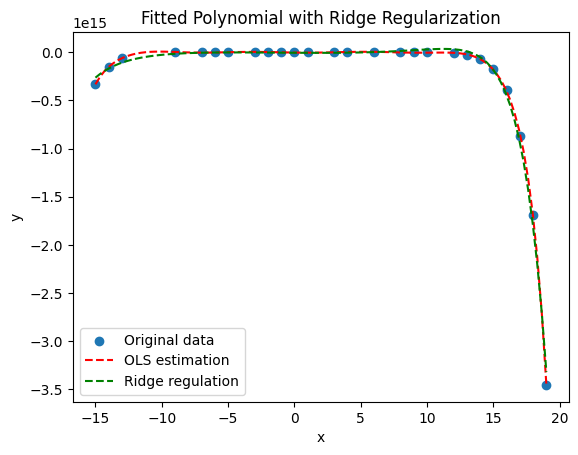

In [37]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Given data points
xi16 = np.array([
    (-1, -8.86), (-13, -58920130116533.12), (17, -866140915086466.4), 
    (-7, -41295993054.77), (-14, -154087458537281.38), (-2, -20641.55), 
    (10, -1061175917386.21), (13, -28662994917882.69), (18, -1692905505090454.8), 
    (19, -3455776315120989), (-6, -7450487214.42), (15, -170516555754100), 
    (16, -392321429648354.06), (14, -71987664014087.9), (0, 6.09), 
    (9, -260718083185.72), (8, -48701345910.59), (-5, -828415535.12), 
    (3, 1071858.9), (1, 26.03), (12, -10378569421572.43), (4, 14040241.49), 
    (6, -579462678.06), (-15, -332415304570490.06), (-9, -786854767238.22), 
    (-3, -2219503.79)
])

# Separate the data points into x and y
x = xi16[:, 0].reshape(-1, 1)
y = xi16[:, 1]

# Create a polynomial of degree 12
degree = 12
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# OLS estimation
ols_model = make_pipeline(polynomial_features, StandardScaler(),LinearRegression())
ols_model.fit(x_scaled, y)
ols_params = ols_model.named_steps['linearregression'].coef_
print(f"The estimated parameters for OLS are: {ols_params}")

# Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model = make_pipeline(polynomial_features, StandardScaler(),ridge_model)
ridge_model.fit(x, y)
ridge_params = ridge_model.named_steps['ridge'].coef_

# Print the estimated parameters
print(f"The estimated parameters for Ridge are: {ridge_params}")


# Predict y values for a range of x values
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_ols = ols_model.predict(x_range_scaled)
y_ridge = ridge_model.predict(x_range)


# Visualize the data and the fitted polynomial
plt.scatter(x, y, label='Original data')
plt.plot(x_range, y_ols, color='red', label='OLS estimation', linestyle='--')
plt.plot(x_range, y_ridge, color='green', label='Ridge regulation', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial with Ridge Regularization')
plt.legend()

plt.show()


### Assignment 6: Bayesian estimate

In [54]:
alpha = 3
n = 10
xi_17 = 59
xi_18 = 49
xi_19 = 66.93

# generate randome samples from a gamma distribution
samples = np.random.gamma(alpha, 1/xi_17, n)



# Calculate the parameters of the posterior distribution
alpha_prime = alpha + n * xi_17
beta_prime = 1 / (n*xi_19 + np.sum(samples))


# Calculate the Bayes point estimate under the square-error loss function (Mean)
theta_Bayes = alpha_prime / beta_prime

# Calculate the mode of the posterior distribution
theta_mode = (alpha_prime - 1) / beta_prime

# Print the results
print(f"alpha': {alpha_prime}")
print(f"beta': {beta_prime}")
print(f"The Bayes point estimate of theta under the square-error loss function is {theta_Bayes}")
print(f"The Bayes point estimate of theta using the mode of the posterior distribution is {theta_mode}")


669.77671076832
alpha': 593
beta': 2.0115910629498277
The Bayes point estimate of theta under the square-error loss function is 294.7915264300368
The Bayes point estimate of theta using the mode of the posterior distribution is 294.2944074984516
